In [1]:
def calc_npv(discount_rate=0.02, t=30):
    """返回换算成现值的成本、换算成现值的收益和净现值
    """
    cost = sum([9000/((1+discount_rate)**i) for i in range(30)])
    profit = 500000/((1+discount_rate)**t)
    return cost, profit, profit - cost

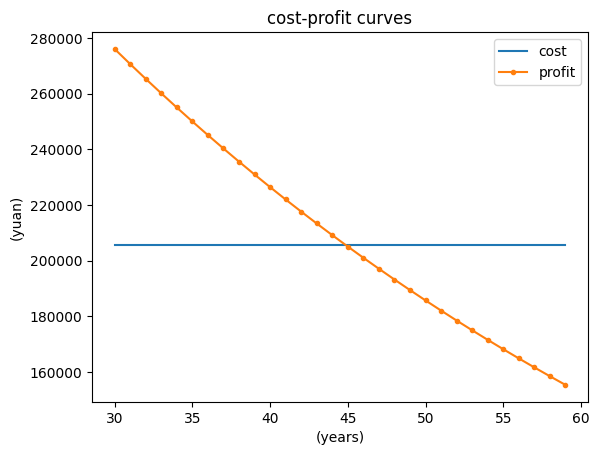

In [2]:
# 成本/收益曲线
import matplotlib.pyplot as plt

discount_rate = 0.02
npv = [calc_npv(discount_rate, t) for t in range(30, 60)]
x_list = list(range(30, 60))
cost_list = [e[0] for e in npv]
profit_list = [e[1] for e in npv]

plt.plot(x_list, cost_list, label='cost')
plt.plot(x_list, profit_list, label='profit', marker='.')
plt.title('cost-profit curves')
plt.xlabel('(years)')
plt.ylabel('(yuan)')
plt.legend()
plt.show()

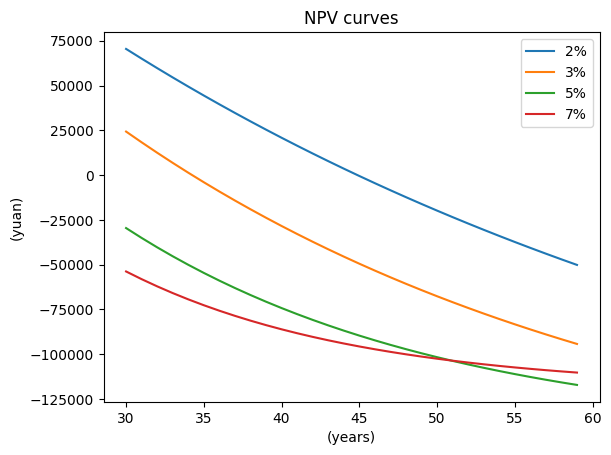

In [3]:
# 不同折现率，对应的净现值曲线
x_list = list(range(30, 60))
get_npv_list = lambda discount_rate: [calc_npv(discount_rate, t)[2] for t in range(30, 60)]
dr_02 = get_npv_list(0.02)
dr_03 = get_npv_list(0.03)
dr_05 = get_npv_list(0.05)
dr_07 = get_npv_list(0.07)

plt.plot(x_list, dr_02, label='2%')
plt.plot(x_list, dr_03, label='3%')
plt.plot(x_list, dr_05, label='5%')
plt.plot(x_list, dr_07, label='7%')
plt.title('NPV curves')
plt.xlabel('(years)')
plt.ylabel('(yuan)')
plt.legend()
plt.show()

In [4]:
calc_npv(discount_rate=0.03, t=35)[2]

-4004.3924053913797

In [5]:
calc_npv(discount_rate=0.07, t=30)[2]

-53815.508019866524

In [6]:
calc_npv(discount_rate=0.07, t=50)[2]

-102525.1868883505

In [7]:
calc_npv(discount_rate=0.03, t=50)[2]

-67642.55141470805

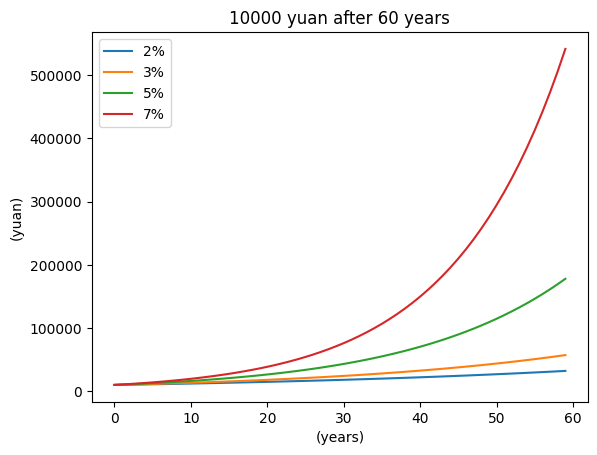

In [8]:
# 一万元现值，60年后对应的金额
x_list = list(range(60))
get_future_list = lambda discount_rate: [10000*((1+discount_rate)**t) for t in range(60)]
dr_02 = get_future_list(0.02)
dr_03 = get_future_list(0.03)
dr_05 = get_future_list(0.05)
dr_07 = get_future_list(0.07)

plt.plot(x_list, dr_02, label='2%')
plt.plot(x_list, dr_03, label='3%')
plt.plot(x_list, dr_05, label='5%')
plt.plot(x_list, dr_07, label='7%')
plt.title('10000 yuan after 60 years')
plt.xlabel('(years)')
plt.ylabel('(yuan)')
plt.legend()
plt.show()

In [9]:
get_future_list(0.02)[-1]

32166.968513386415

In [10]:
get_future_list(0.03)[-1]

57200.03013636647

In [11]:
get_future_list(0.05)[-1]

177897.00851545707

In [12]:
get_future_list(0.07)[-1]

541555.3909769504

In [13]:
import numpy as np
from scipy.optimize import fsolve

def calc_root(t=50):
    f = lambda e: 500000/((1+e)**t) - sum([9000/((1+e)**i) for i in range(30)])
    return fsolve(f, 0)[0]

root = calc_root()
print(root)

0.017197441656029447


In [14]:
import numpy as np
from scipy.optimize import fsolve

def calc_root(t=50):
    f = lambda e: 500000/((1+e)**t) - sum([9000/((1+e)**i) for i in range(30)])
    root = fsolve(f, 0)
    return root, np.isclose(f(root), 0.0)

root = calc_root()
root

(array([0.01719744]), array([ True]))